# Final Project Submission

Please fill out:
* Student name: Joseph Husney
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


## Introduction
Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them better understand the movie industry.
Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

### Import necessary modules

In [112]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from tqdm import tqdm

In [102]:
#Allowing pandas to display unlimited info
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

### Retrieve id's to get details about
Before analyzing the data, it must first be retrieved. Inside the package given to us, there is a file that has all the movie id's. These Id's will tell the api which movies to get data about. This code will get all the id's past the year 2000 and put them into a list

In [8]:
df = pd.read_csv('zippedData/tmdb_5000_movies.csv')

# movie_ids = []
# for index, rows in df.iterrows():
#     if int(df['release_date'][0].split('-')[0]) > 2000:
#         my_list = [rows.id]
#         movie_ids.append(my_list)
# print(movie_ids[:20])

In [9]:
# len(movie_ids)

In [10]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [11]:
df.shape

(4803, 20)

## Retrieve all data from moviedb api - MAY NOT BE NECESSARY ANYMORE
In order to retrieve all the data from the api, you need to go to the website and sign up for a unique api key. Using that and other parameters such as language, one can link into their api to get the details for the movie id's we have retrieved. 
Using a loop to change the url to get details about all the movie id's that have been retrieved.

#### Function to read key from file in my path

In [ ]:
# import json

# def get_keys(path):
#     with open(path) as f:
#         return json.load(f)

#### If *scrape_data* is true, this will get all the data from the api. If it is false, it will import the data from a csv file in this package that was previously retrieved from the api

In [ ]:
# scrape_data = False

# if scrape_data:
#     print("scraping file")
#     movie_info = []
#     keys = get_keys("/Users/joey/.secret/the_movie_db_api.json")
#     api_key = keys['api_key']
#     headers = {
#             'Authorization': 'Bearer {}'.format(api_key)
#         }

#     url_params = {
#                     'language':'en-US'
#                 }

#     for id_ in tqdm(movie_ids[:2000]):
#         url = f"https://api.themoviedb.org/3/movie/{id_[0]}"
#         response = requests.get(url, headers=headers, params=url_params)
#         movie_info.append(response.json())
#     df = pd.DataFrame.from_dict(movie_info)
#     df.to_csv('movie_df.csv')
# else:
#     df = pd.read_csv('movie_df.csv', index_col=0)
#     print('loading file')

Once we have retrieved all the details for these movies, we will analyze it through the lens of a pandas dataframe

In [12]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

## Data Cleaning
Upon inspecting the data, it became clear that there are many movies missing certain important data points. For instance, some movies don't have genre data. Others have a budget and/or revenue of zero. Here we will clean up the data by deleting those rows from the dataframe.

### Get rid of rows without genre data

In [14]:
df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [7]:
# df = df[~df['genres'].isna()]

### Get rid of rows with budget or revenue of zero

In [16]:
indexNames1 = df[ df['budget'] == 0 ].index
indexNames2 = df[ df['revenue'] == 0 ].index
len(indexNames1), len(indexNames2)

(1037, 1427)

In [17]:
indexNames = df[ df['budget'] == 0 ].index
df.drop(indexNames , inplace=True)


indexNames = df[ df['revenue'] == 0 ].index
df.drop(indexNames , inplace=True)

In [19]:
df.shape

(3229, 20)

#### This tells me that my genres column got converted from a dict to a string when I wrote it to csv. Will now convert it back to dictionary to make it easier to extract the genre names from the genres column

In [20]:
type(df['genres'][0])

str

In [21]:
import ast
df['genres'] = df['genres'].map(ast.literal_eval)

In [24]:
type(df['genres'][0][0])

dict

## Now we will discuss four questions that will shed some light on which movies microsoft should invest in

### Question 1: What is the *domestic* average gross profit margin categorized by movie genre?

In [25]:
def seperate_genres(genre_list):
    genres = []
    for genre in genre_list:
            genres.append(genre['name'])
    return genres

In [26]:
len(df['genres'])

3229

In [27]:
df['genres'].isna().sum()

0

In [28]:
df['genre'] = df['genres'].map(seperate_genres)

In [29]:
genre_df_explode = df.explode('genre')

In [30]:
genre_df_explode['profit'] = genre_df_explode['revenue'] - genre_df_explode['budget']

In [36]:
genre_df_explode['profit_margin'] = (genre_df_explode['profit'] / genre_df_explode['budget'])

In [37]:
genre_df_explode[['title','budget','revenue', 'profit','profit_margin']].head(35)

,title,budget,revenue,profit,profit_margin
0,Avatar,237000000,2787965087,2550965087,10.763566
0,Avatar,237000000,2787965087,2550965087,10.763566
0,Avatar,237000000,2787965087,2550965087,10.763566
0,Avatar,237000000,2787965087,2550965087,10.763566
1,Pirates of the Caribbean: At World's End,300000000,961000000,661000000,2.203333
1,Pirates of the Caribbean: At World's End,300000000,961000000,661000000,2.203333
1,Pirates of the Caribbean: At World's End,300000000,961000000,661000000,2.203333
2,Spectre,245000000,880674609,635674609,2.594590
2,Spectre,245000000,880674609,635674609,2.594590
2,Spectre,245000000,880674609,635674609,2.594590


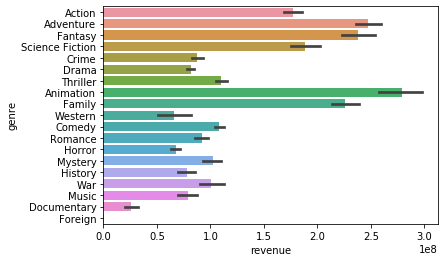

In [51]:
fig = sns.barplot(y= 'genre', x='revenue', data=genre_df_explode, ci=68)
# fig.set(xlabel='Average Profit Margin (%)', ylabel='Genres')

#### Conclusion: Looks like Documentaries make way more than the rest. Don't invest in war movies!

### Question 2: Is there an optimal runtime for domestic movies. If so, what is it?

In [52]:
df_runtime = df.copy()

In [53]:
df_runtime['profit'] = df_runtime['revenue'] - df_runtime['budget']
df_runtime['profit_margin'] = (df_runtime['profit'] / df_runtime['budget'])*100

In [54]:
df_runtime['runtime']

0       162.0
1       169.0
2       148.0
3       165.0
4       132.0
        ...  
4773     92.0
4788     93.0
4792    111.0
4796     77.0
4798     81.0
Name: runtime, Length: 3229, dtype: float64

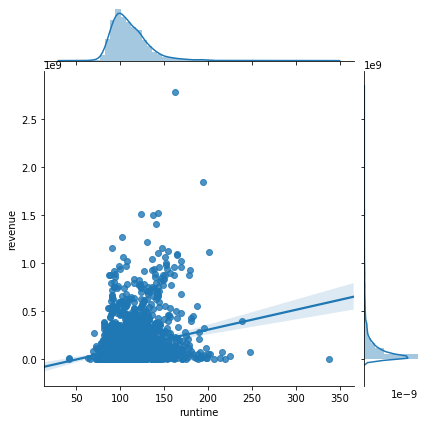

In [56]:
sns.jointplot("runtime", "revenue", data=df_runtime, kind="reg")

#### Conclusion: Don't worry about how long you make the movie because there is no correlation. You might as well make it shorter because the length is definitely not an advantage. 

### Question 3: Are movies that are part of a collection likely to be more popular?

In [ ]:
df['popularity'].value_counts()

In [57]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'genre'],
      dtype='object')

In [59]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Action, Adventure, Crime]"
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Action, Adventure, Science Fiction]"


In [60]:
df['release_date'].sort_values()

4592    1916-09-04
4661    1925-11-05
2638    1927-01-10
4594    1929-02-08
3804    1930-11-15
           ...    
97      2016-07-29
72      2016-08-02
3013    2016-08-10
357     2016-08-17
4720    2016-09-09
Name: release_date, Length: 3229, dtype: object

In [67]:
type(df['production_companies'][0][0])

str

In [68]:
df['production_companies'] = df['production_companies'].map(ast.literal_eval)

In [72]:
type(df['production_companies'][0][0])

KeyError: 0

In [76]:
list_of_dicts = df['production_companies'][0]

In [79]:

list_of_dicts
company_name

['Ingenious Film Partners',
 'Twentieth Century Fox Film Corporation',
 'Dune Entertainment',
 'Lightstorm Entertainment']

In [81]:
def seperate_production_companies(company_list):
    company_names = []
    for dict_ in company_list:
        company_names.append(dict_['name'])
    return company_names

In [82]:
df['production_companies'] = df['production_companies'].map(seperate_production_companies)

In [83]:
df['production_companies']

0       [Ingenious Film Partners, Twentieth Century Fo...
1       [Walt Disney Pictures, Jerry Bruckheimer Films...
2                        [Columbia Pictures, Danjaq, B24]
3       [Legendary Pictures, Warner Bros., DC Entertai...
4                                  [Walt Disney Pictures]
                              ...                        
4773              [Miramax Films, View Askew Productions]
4788                              [Dreamland Productions]
4792                                      [Daiei Studios]
4796                                          [Thinkfilm]
4798                                  [Columbia Pictures]
Name: production_companies, Length: 3229, dtype: object

In [84]:
production_company_df = df.explode('production_companies')

In [85]:
production_company_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Ingenious Film Partners,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Twentieth Century Fox Film Corporation,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Dune Entertainment,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Lightstorm Entertainment,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Walt Disney Pictures,...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{'id': 35, 'name': 'Comedy'}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,View Askew Productions,...,1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,[Comedy]
4788,12000,"[{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...",NaN,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,Dreamland Productions,...,1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110,"[Horror, Comedy, Crime]"
4792,20000,"[{'id': 80, 'name': 'Crime'}, {'id': 27, 'name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of gruesome murders is sweeping Tokyo. ...,0.212443,Daiei Studios,...,1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Madness. Terror. Murder.,Cure,7.4,63,"[Crime, Horror, Mystery, Thriller]"
4796,7000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.primermovie.com,14337,"[{""id"": 1448, ""name"": ""distrust""}, {""id"": 2101...",en,Primer,Friends/fledgling entre

In [104]:
production_company_df['production_companies']

Warner Bros.                              280
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
New Line Cinema                           142
Relativity Media                          100
Walt Disney Pictures                       96
Touchstone Pictures                        93
Metro-Goldwyn-Mayer (MGM)                  92
Columbia Pictures Corporation              86
Village Roadshow Pictures                  73
DreamWorks SKG                             67
Miramax Films                              67
United Artists                             64
Regency Enterprises                        59
Dune Entertainment                         54
TriStar Pictures                           50
Lionsgate                                  49
Summit Entertainment                       48
Canal+                                     48
Fox Searchlight Pictures          

In [110]:
production_company_df['production_companies'].value_counts()

Warner Bros.                              280
Universal Pictures                        273
Paramount Pictures                        245
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         167
                                         ... 
Bernd Eichinger Productions                 1
Feature Film Project                        1
Tangled Web Productions                     1
Katira Productions GmbH & Co. KG            1
Vast Entertainment                          1
Name: production_companies, Length: 3564, dtype: int64

In [131]:
production_company_df = production_company_df[production_company_df.groupby('production_companies')['production_companies'].transform('count').ge(30)]

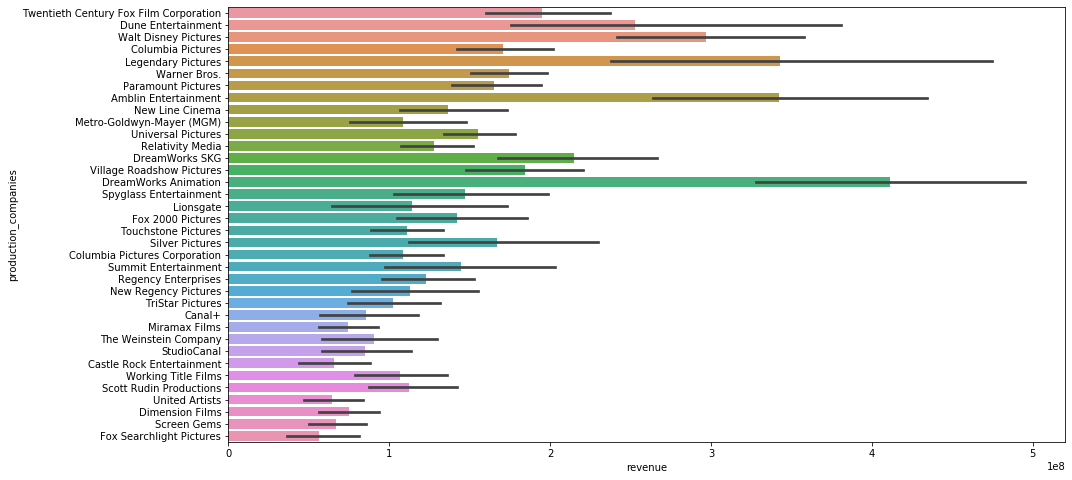

In [138]:
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "revenue", y = "production_companies", ax=ax, data=production_company_df)

#### Conclusion: The top production companies in terms of revenue are DreamWorks animation, Lengendary Pictures, Amblin Entertainment, Walt Disney Pictures, and Dune entertainment. Therefore, microsoft should consider consulting with these companies to help them produce their movies